In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Access the data which is in list format
# We use open function to access the file content

tran = []
with open(r"/content/transactions_retail.csv") as f:
    tran = f.read()

print(type(tran))
tran

<class 'str'>


'\'HANGING\',\'HEART\',\'HOLDER\',\'T-LIGHT\',\'WHITE\',NA\n\'LANTERN\',\'METAL\',\'WHITE\',NA,NA,NA\n\'COAT\',\'CREAM\',\'CUPID\',\'HANGER\',\'HEARTS\',NA\n\'BOTTLE\',\'FLAG\',\'HOT\',\'KNITTED\',\'UNION\',\'WATER\'\n\'HEART.\',\'HOTTIE\',\'RED\',\'WHITE\',\'WOOLLY\',NA\n\'7\',\'BABUSHKA\',\'BOXES\',\'NESTING\',\'SET\',NA\n\'FROSTED\',\'GLASS\',\'HOLDER\',\'STAR\',\'T-LIGHT\',NA\n\'HAND\',\'JACK\',\'UNION\',\'WARMER\',NA,NA\n\'DOT\',\'HAND\',\'POLKA\',\'RED\',\'WARMER\',NA\n\'ASSORTED\',\'BIRD\',\'COLOUR\',\'ORNAMENT\',NA,NA\n\'BEDROOM\',\'PLAYHOUSE\',\'POPPY\'\'S\',NA,NA,NA\n\'KITCHEN\',\'PLAYHOUSE\',\'POPPY\'\'S\',NA,NA,NA\n\'CHARLOTTE\',\'DOLL\',\'FELTCRAFT\',\'PRINCESS\',NA,NA\n\'COSY\',\'IVORY\',\'KNITTED\',\'MUG\',NA,NA\n\'6\',\'ASSORTED\',\'BOX\',\'COLOUR\',\'OF\',\'TEASPOONS\'\n\'BLOCKS\',\'BOX\',\'JIGSAW\',\'OF\',\'VINTAGE\',NA\n\'ALPHABET\',\'BLOCKS\',\'BOX\',\'OF\',\'VINTAGE\',NA\n\'BLOCK\',\'BUILDING\',\'HOME\',\'WORD\',NA,NA\n\'BLOCK\',\'BUILDING\',\'LOVE\',\'WORD\',NA,NA

In [4]:
# splitting the data into separate transactions using separator as "\n"
tran = tran.split("\n")
tran

["'HANGING','HEART','HOLDER','T-LIGHT','WHITE',NA",
 "'LANTERN','METAL','WHITE',NA,NA,NA",
 "'COAT','CREAM','CUPID','HANGER','HEARTS',NA",
 "'BOTTLE','FLAG','HOT','KNITTED','UNION','WATER'",
 "'HEART.','HOTTIE','RED','WHITE','WOOLLY',NA",
 "'7','BABUSHKA','BOXES','NESTING','SET',NA",
 "'FROSTED','GLASS','HOLDER','STAR','T-LIGHT',NA",
 "'HAND','JACK','UNION','WARMER',NA,NA",
 "'DOT','HAND','POLKA','RED','WARMER',NA",
 "'ASSORTED','BIRD','COLOUR','ORNAMENT',NA,NA",
 "'BEDROOM','PLAYHOUSE','POPPY''S',NA,NA,NA",
 "'KITCHEN','PLAYHOUSE','POPPY''S',NA,NA,NA",
 "'CHARLOTTE','DOLL','FELTCRAFT','PRINCESS',NA,NA",
 "'COSY','IVORY','KNITTED','MUG',NA,NA",
 "'6','ASSORTED','BOX','COLOUR','OF','TEASPOONS'",
 "'BLOCKS','BOX','JIGSAW','OF','VINTAGE',NA",
 "'ALPHABET','BLOCKS','BOX','OF','VINTAGE',NA",
 "'BLOCK','BUILDING','HOME','WORD',NA,NA",
 "'BLOCK','BUILDING','LOVE','WORD',NA,NA",
 "'BOX','HEART','METAL','RECIPE','WITH',NA",
 "'DOORMAT','ENGLAND','NEW',NA,NA,NA",
 "'JAM','JARS','MAKING','SET','W

In [5]:
viewing = pd.DataFrame(tran)
viewing.head(10)

0
0  'HANGING','HEART','HOLDER','T-LIGHT','WHITE',NA
1               'LANTERN','METAL','WHITE',NA,NA,NA
2      'COAT','CREAM','CUPID','HANGER','HEARTS',NA
3  'BOTTLE','FLAG','HOT','KNITTED','UNION','WATER'
4      'HEART.','HOTTIE','RED','WHITE','WOOLLY',NA
5        '7','BABUSHKA','BOXES','NESTING','SET',NA
6   'FROSTED','GLASS','HOLDER','STAR','T-LIGHT',NA
7             'HAND','JACK','UNION','WARMER',NA,NA
8           'DOT','HAND','POLKA','RED','WARMER',NA
9      'ASSORTED','BIRD','COLOUR','ORNAMENT',NA,NA

In [6]:
# Identifying each individual items in each transaction

tran_list = []
for i in tran:
    tran_list.append(i.split(","))
    
print(tran_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
# TransactionEncoder: Encoder for transaction data in Python lists
# Encodes transaction data in form of a Python list of lists into a NumPy array

TE = TransactionEncoder()
X_1hot = TE.fit(tran_list).transform(tran_list) 

print(X_1hot)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [8]:
transf_df = pd.DataFrame(X_1hot, columns = TE.columns_)
print(transf_df)
print(transf_df.shape)

           "'  "'25W    "'A  "'ASHTRAY  "'BIN  "'BOX  "'BUTTERFLIES  \
0       False  False  False      False  False  False          False   
1       False  False  False      False  False  False          False   
2       False  False  False      False  False  False          False   
3       False  False  False      False  False  False          False   
4       False  False  False      False  False  False          False   
...       ...    ...    ...        ...    ...    ...            ...   
126692  False  False  False      False  False  False          False   
126693  False  False  False      False  False  False          False   
126694  False  False  False      False  False  False          False   
126695  False  False  False      False  False  False          False   
126696  False  False  False      False  False  False          False   

        "'CABINET  "'CAKESTAND  "'CARD  ...  MAGIC'"  METAL'"     NA  PINK'"  \
0           False        False   False  ...    False    False   Tru

"'           326
"'25W          1
"'A           14
"'ASHTRAY      1
"'BIN          2
            ... 
SQUARE         8
SUGAR'"      157
THE'"          2
TREES'"        5
pack/12'"      4
Length: 2179, dtype: int64


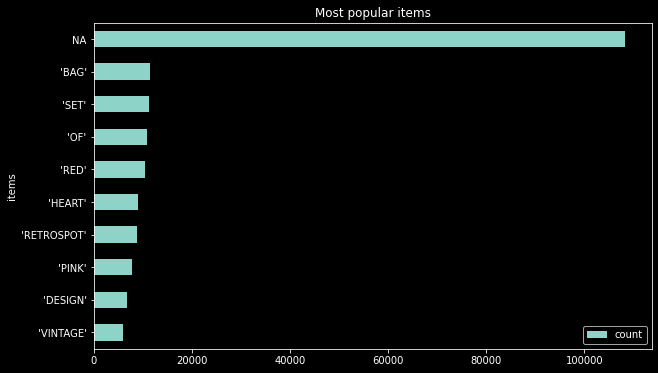

In [9]:
### Elementary Analysis ###
# Most popular items
count = transf_df.loc[:, :].sum()
print(count)

pop_item = count.sort_values(0, ascending = False).head(10)
pop_item

pop_item = pop_item.to_frame()
pop_item

pop_item = pop_item.reset_index()
pop_item

pop_item = pop_item.rename(columns = {"index": "items", 0: "count"})
pop_item


# Data Visualization
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6) # rc stands for runtime configuration 
matplotlib.style.use('dark_background')
ax = pop_item.plot.barh(x = 'items', y = 'count')
plt.title('Most popular items')
plt.gca().invert_yaxis() # gca means "get current axes"

In [10]:
# Itemsets
frequent_itemsets = apriori(transf_df, min_support = 0.0075, max_len = 4, use_colnames = True)
frequent_itemsets

support                                   itemsets
0    0.014917                                     ('12')
1    0.007869                                      ('2')
2    0.033852                                      ('3')
3    0.015786                                      ('4')
4    0.018367                                      ('6')
..        ...                                        ...
326  0.009329  ('HEART', 'T-LIGHT', 'HOLDER', 'HANGING')
327  0.009479         ('HEART', NA, 'HOLDER', 'HANGING')
328  0.009329        ('T-LIGHT', NA, 'HEART', 'HANGING')
329  0.012818       ('T-LIGHT', NA, 'HOLDER', 'HANGING')
330  0.011429         ('T-LIGHT', NA, 'HEART', 'HOLDER')

[331 rows x 2 columns]

In [11]:
# Most frequent itemsets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)
frequent_itemsets

support         itemsets
122  0.855024             (NA)
11   0.090697          ('BAG')
90   0.088210          ('SET')
77   0.085685           ('OF')
150  0.084011      ('BAG', NA)
..        ...              ...
104  0.007609         ('TIER')
254  0.007601  ('STORAGE', NA)
111  0.007553         ('WALL')
216  0.007522    ('IN', 'TIN')
97   0.007514         ('STAR')

[331 rows x 2 columns]

In [12]:
# Association Rules
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
print(rules.head(20))

             antecedents           consequents  antecedent support  \
0                ('BAG')                  (NA)            0.090697   
1                   (NA)               ('BAG')            0.855024   
2                   (NA)               ('RED')            0.855024   
3                ('RED')                  (NA)            0.083254   
4                   (NA)             ('HEART')            0.855024   
5              ('HEART')                  (NA)            0.071533   
6                 ('OF')               ('SET')            0.085685   
7                ('SET')                ('OF')            0.088210   
8                ('RED')         ('RETROSPOT')            0.083254   
9          ('RETROSPOT')               ('RED')            0.068999   
10           ('VINTAGE')                  (NA)            0.046820   
11                  (NA)           ('VINTAGE')            0.855024   
12           (NA, 'RED')         ('RETROSPOT')            0.071391   
13     (NA, 'RETROSP

In [13]:
rules.sort_values('lift', ascending = False).head(10)

antecedents                consequents  antecedent support  \
516  ('BAKELIKE', 'CLOCK', NA)                  ('ALARM')            0.008035   
510      ('BAKELIKE', 'CLOCK')                  ('ALARM')            0.008035   
538              (NA, 'ALARM')               ('BAKELIKE')            0.008351   
539               ('BAKELIKE')              (NA, 'ALARM')            0.008035   
529                  ('ALARM')  ('BAKELIKE', 'CLOCK', NA)            0.008351   
515                  ('ALARM')      ('BAKELIKE', 'CLOCK')            0.008351   
531                  ('ALARM')               ('BAKELIKE')            0.008351   
526               ('BAKELIKE')     ('CLOCK', NA, 'ALARM')            0.008035   
513               ('BAKELIKE')         ('CLOCK', 'ALARM')            0.008035   
541                  ('ALARM')           ('BAKELIKE', NA)            0.008351   

     consequent support   support  confidence        lift  leverage  \
516            0.008351  0.008035    1.000000  119.751418  0.007968   
510            0.008351  0.008035    1.000000  119.751418  0.007968   
538            0.008035  0.008035    0.962193  119.751418  0.007968   
539            0.008351  0.008035    1.000000  119.751418  0.007968   
529            0.008035  0.008035    0.962193  119.751418  0.007968   
515            0.008035  0.008035    0.962193  119.751418  0.007968   
531            0.008035  0.008035    0.962193  119.751418  0.007968   
526            0.008351  0.008035    1.000000  119.751418  0.007968   
513            0.008351  0.008035    1.000000  119.751418  0.007968   
541            0.008035  0.008035    0.962193  119.751418  0.007968   

     conviction  
516         inf  
510         inf  
538   26.237476  
539         inf  
529   26.237476  
515   26.237476  
531   26.237476  
526         inf  
513         inf  
541   26.237476

In [14]:
# Sorted list and top 10 rules 
rules10 = rules.sort_values('lift', ascending = False).head(10)

rules10

antecedents                consequents  antecedent support  \
516  ('BAKELIKE', 'CLOCK', NA)                  ('ALARM')            0.008035   
510      ('BAKELIKE', 'CLOCK')                  ('ALARM')            0.008035   
538              (NA, 'ALARM')               ('BAKELIKE')            0.008351   
539               ('BAKELIKE')              (NA, 'ALARM')            0.008035   
529                  ('ALARM')  ('BAKELIKE', 'CLOCK', NA)            0.008351   
515                  ('ALARM')      ('BAKELIKE', 'CLOCK')            0.008351   
531                  ('ALARM')               ('BAKELIKE')            0.008351   
526               ('BAKELIKE')     ('CLOCK', NA, 'ALARM')            0.008035   
513               ('BAKELIKE')         ('CLOCK', 'ALARM')            0.008035   
541                  ('ALARM')           ('BAKELIKE', NA)            0.008351   

     consequent support   support  confidence        lift  leverage  \
516            0.008351  0.008035    1.000000  119.751418  0.007968   
510            0.008351  0.008035    1.000000  119.751418  0.007968   
538            0.008035  0.008035    0.962193  119.751418  0.007968   
539            0.008351  0.008035    1.000000  119.751418  0.007968   
529            0.008035  0.008035    0.962193  119.751418  0.007968   
515            0.008035  0.008035    0.962193  119.751418  0.007968   
531            0.008035  0.008035    0.962193  119.751418  0.007968   
526            0.008351  0.008035    1.000000  119.751418  0.007968   
513            0.008351  0.008035    1.000000  119.751418  0.007968   
541            0.008035  0.008035    0.962193  119.751418  0.007968   

     conviction  
516         inf  
510         inf  
538   26.237476  
539         inf  
529   26.237476  
515   26.237476  
531   26.237476  
526         inf  
513         inf  
541   26.237476

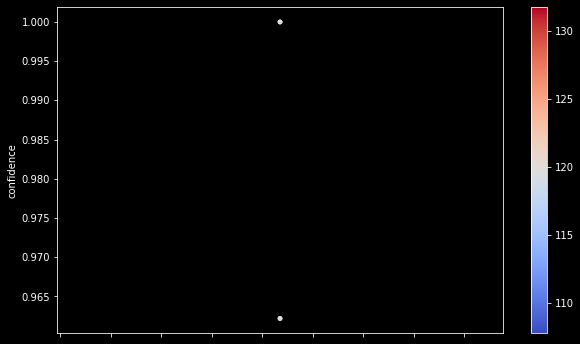

In [15]:
rules10.plot(x = "support", y = "confidence", c = rules10.lift, kind="scatter", s = 12, cmap = plt.cm.coolwarm)